In [146]:
from __future__ import print_function
import multiprocessing
cpus = multiprocessing.cpu_count()
from scipy import stats as s
from pylab import *
import os
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from nst import nst
from bpf import bpf

In [147]:
cmap = cm.get_cmap('bwr_r',1001)
masteraplitude = np.arange(-500,501,1) # Blue-white-red
r1 = []
g1 = [] 
b1 = []

for i in range(cmap.N):
    rgba = cmap(i)[:3] # will return rgba, we take only first 3 so we get rgb
    r1.extend([rgba[0]])
    g1.extend([rgba[1]])
    b1.extend([rgba[2]])

img = io.imread('data/seismic.jpg')

r2 = img[:,:,0]
g2 = img[:,:,1]
b2 = img[:,:,2]

nx = r2.shape[1]
ny = r2.shape[0]

# rescale
r2 = r2.flatten()/255
g2 = g2.flatten()/255
b2 = b2.flatten()/255

slave_amplitude = []

for i in range(len(r2)):
    d=[]
    idx=[]
    for j in range(len(r1)):
        d.append()

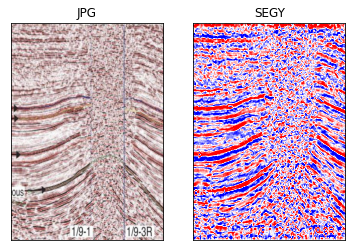

In [151]:
cmap = cm.get_cmap('bwr_r', 1001)
masteramplitude = np.arange(-500,501,1)   #blue-white-red
r1=[]
g1=[]
b1=[]
for i in range(cmap.N):
    rgba = cmap(i)[:3] # will return rgba, we take only first 3 so we get rgb
    r1.extend([rgba[0]])
    g1.extend([rgba[1]])
    b1.extend([rgba[2]])
#
###############SLAVE COLOR
img = io.imread('data/seismic.jpg')  #INPUT



r2 = img[:,:,0]  #get time sample high res
g2 = img[:,:,1]
b2 = img[:,:,2]

nx = r2.shape[1]
ny = r2.shape[0]

# if not rescale
r2 = r2.flatten()/255
g2 = g2.flatten()/255
b2 = b2.flatten()/255



slaveamplitude = []
for i in range(len(r2)):
    d=[]
    idx=[]
    for j in range(len(r1)):
        d.append(((r2[i]-r1[j])**2+(g2[i]-g1[j])**2+(b2[i]-b1[j])**2)**0.5) #Euclidian distance
        idx.append(j)
    didx = np.vstack((d,idx)).T
    didx = didx[didx[:, 0].argsort()]  # sort based on col 1
    didx = didx[0:5,:] #get 5 neigbours
    index = didx[:,1] #get index
    index = np.array(index, dtype=int)
    amps = masteramplitude[index]
    slaveamplitude.append(int(s.mode(amps)[0]))  # get most occurance amplitude vals


np.save('traces', slaveamplitude)
traces = slaveamplitude

traces = np.reshape(traces, (ny,nx))

traces = nst(traces)


sr = 1

traces = bpf(traces,25,250,sr)

img = io.imread('data/seismic.jpg')  #INPUT
r = img[:,:,0]
g = img[:,:,1]
b = img[:,:,2]

nx = r.shape[1]
ny = r.shape[0]

plt.subplot(1,2,1)
im = plt.imshow(img, aspect='auto')
plt.title('JPG')
plt.xticks([])
plt.yticks([])

plt.subplot(1,2,2)
scale = 1.5
rmstr = traces[:, int(traces.shape[1] / 3):int(traces.shape[1] / 2)]
rms = np.std(rmstr - rmstr.mean(axis=0))
im = plt.imshow(traces, aspect='auto', interpolation='bilinear', origin='upper', vmin=-rms*scale, vmax = rms*scale, cmap='bwr_r')
plt.title('SEGY')
plt.xticks([])
plt.yticks([])
plt.show()